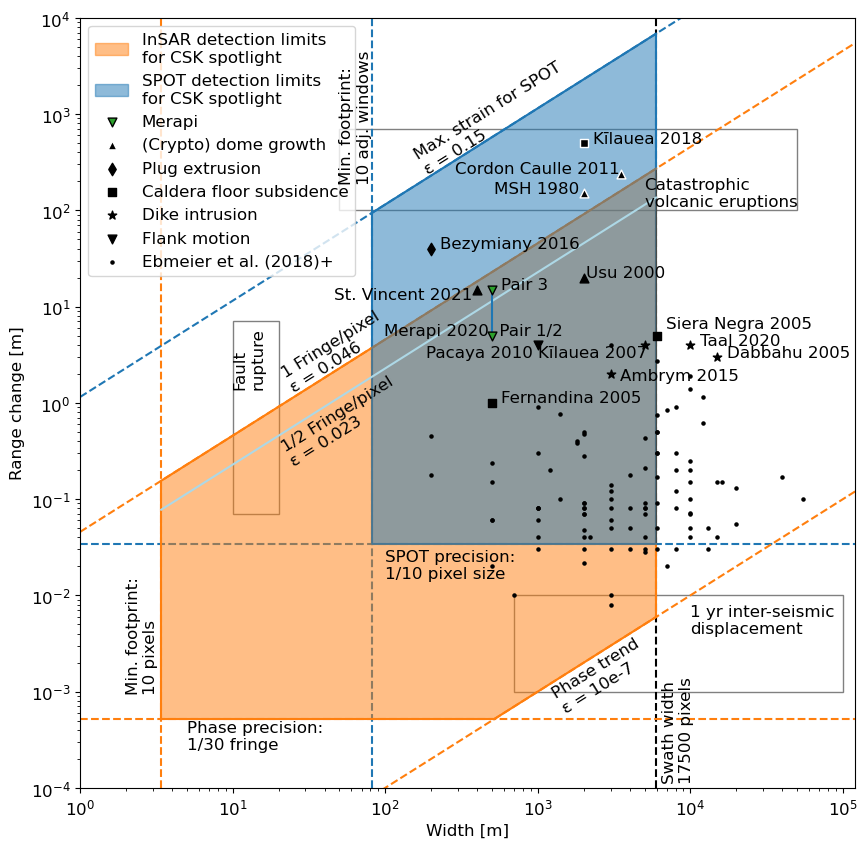

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib.patches import Polygon
import matplotlib.patches as mpatches
import pandas as pd

df = pd.read_csv('/Users/markbemelmans/Documents/PhD/lit_review/volcdef_table_v3.csv')
df_mag = df.magnitude/100
df_ax = df.major_axis*1000


# define constants
SAT_PROD = 'CSK spotlight'
WIN_SIZE = 224
RES = 0.34
N_WIN = 10
LAMBDA = 0.031
SPACING = 24
N_PIX = 10
WIDTH = 17478
WIDTH = 17500
CYCLE_SLICE = 1/30
SPOT_LIM = 1/10
SPOT_STRAIN=1.15


INSAR_color = 'tab:orange'
SPOT_color = 'tab:blue'

x_min = 1
x_max = 120_000
y_min = 0.0001
y_max = 10_000
fontsize=12
matplotlib.rcParams.update({'font.size': fontsize})

INSAR_poly = [[N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,(LAMBDA/(2*RES))*N_PIX*RES],
              [WIDTH*RES,(LAMBDA/(2*RES))*WIDTH*RES],
              [WIDTH*RES,10e-7*WIDTH*RES],
              [(CYCLE_SLICE*(LAMBDA/2))/10e-7,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)]]

SPOT_poly = [[N_PIX*SPACING*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_STRAIN*N_PIX*SPACING*RES],
              [WIDTH*RES,SPOT_STRAIN*WIDTH*RES],
              [WIDTH*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_LIM*RES]]

polygon_INSAR = Polygon(INSAR_poly, closed=True,color=INSAR_color,alpha=0.5,label=f'InSAR detection limits\nfor {SAT_PROD}',zorder=100)
polygon_SPOT = Polygon(SPOT_poly, closed=True,color=SPOT_color,alpha=0.5,label=f'SPOT detection limits\nfor {SAT_PROD}',zorder=100)



fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.add_patch(polygon_INSAR)
ax.add_patch(polygon_SPOT)

# plot dashed lines
ax.axvline([N_PIX*RES],ymin=y_min,ymax=y_max,c=INSAR_color,linestyle='--') # INSAR smallest displacement size
ax.axvline([N_PIX*SPACING*RES],ymin=y_min,ymax=y_max,c=SPOT_color,linestyle='--') # SPOT smallest displacement size

ax.axvline([WIDTH*RES],ymin=y_min,ymax=y_max,c='black',linestyle='--') # largest displacement size

ax.plot([x_min,x_max],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linestyle='--') # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([x_min,x_max],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linestyle='--') # SPOT smallest detectable displacement magnitude

ax.plot([x_min,x_max],[(LAMBDA/(2*RES))*x_min,(LAMBDA/(2*RES))*x_max],c=INSAR_color,linestyle='--') # INSAR max detectable lateral displacement gradient
ax.plot([x_min,x_max],[SPOT_STRAIN*x_min,SPOT_STRAIN*x_max],c=SPOT_color,linestyle='--') # SPOT max detectable lateral displacement gradient

ax.plot([x_min,x_max],[10e-7*x_min,10e-7*x_max],c=INSAR_color,linestyle='--') # INSAR min detectable lateral displacement gradient

# plot solid lines
ax.plot([N_PIX*RES,N_PIX*RES],[CYCLE_SLICE*(LAMBDA/2),(LAMBDA/(2*RES))*N_PIX*RES],c=INSAR_color) # INSAR smallest displacement size
ax.plot([N_PIX*SPACING*RES,N_PIX*SPACING*RES],[SPOT_LIM*RES,N_PIX*SPACING*RES*SPOT_STRAIN],c=SPOT_color) # SPOT smallest displacement size

ax.plot([WIDTH*RES,WIDTH*RES],[10e-7*WIDTH*RES,SPOT_LIM*RES],c=INSAR_color) # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[SPOT_LIM*RES,(LAMBDA/(2*RES))*WIDTH*RES],c='black') # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[(LAMBDA/(2*RES))*WIDTH*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color) # largest displacement size



ax.plot([N_PIX*RES,(CYCLE_SLICE*(LAMBDA/2))/10e-7],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color) # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color) # SPOT smallest detectable displacement magnitude


ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(2*RES))*N_PIX*RES,(LAMBDA/(2*RES))*WIDTH*RES],c=INSAR_color) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(4*RES))*N_PIX*RES,(LAMBDA/(4*RES))*WIDTH*RES],c='lightblue',zorder=150) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_STRAIN*N_PIX*SPACING*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color) # SPOT max detectable lateral displacement gradient

ax.plot([(CYCLE_SLICE*(LAMBDA/2))/10e-7,WIDTH*RES],[CYCLE_SLICE*(LAMBDA/2),10e-7*WIDTH*RES],c=INSAR_color) # INSAR min detectable lateral displacement gradient

## add displacement signal patches

# volc_eruptions = mpatches.Polygon([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]],facecolor=None,ec='grey')
# fault_rupture = mpatches.Polygon([[10,0.07],[10,7],[20,7],[20,0.07],[10,0.07]],facecolor=None,ec='grey')
# interseismic = mpatches.Polygon([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]],facecolor=None,ec='grey')

volc_eruptions =np.array([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]])
fault_rupture = np.array([[10,0.07],[10,7],[20,7],[20,0.07],[10,0.07]])
interseismic = np.array([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]])
ax.fill(volc_eruptions[:,0],volc_eruptions[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(fault_rupture[:,0],fault_rupture[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(interseismic[:,0],interseismic[:,1],facecolor=[0,0,0,0], ec='grey')

# ax.add_patch(volc_eruptions)
# ax.add_patch(fault_rupture)
# ax.add_patch(interseismic)
s = 40
div = 1
ax.plot([500/div,500/div],[5,15],zorder=200)
ax.scatter(500/div,5,s=s,c='tab:green',marker='v',zorder=200,ec='black',label='Merapi') # Merapi 2021
ax.scatter(500/div,15,s=s,c='tab:green',marker='v',zorder=200,ec='black') # Merapi 2021
ax.scatter(2000/div,150,s=s,c='black',marker='^',zorder=200,ec='white',label='(Crypto) dome growth') # MSH crypto dome growth
ax.scatter(3500/div,240,s=s,c='black',marker='^',zorder=200,ec='white') # Cordon Caulle laccolith growth
ax.scatter(2000/div,500,s=s,c='black',marker='s',zorder=200,ec='white') # Kilauea 2018 caldera floor subsidence

ax.scatter(400/div,15,s=s,c='black',marker='^',zorder=200) # St. Vincent lava dome growth
ax.scatter(2000/div,20,s=s,c='black',marker='^',zorder=200) # Usu volcano crypto dome growth
ax.scatter(200/div,40,s=s,c='black',marker='d',zorder=200,label='Plug extrusion') # Bezymianny crater floor uplift
ax.scatter(6000/div,5,s=s,c='black',marker='s',zorder=200,label='Caldera floor subsidence') # Siera Nerga co-eruptive subsidence 
ax.scatter(3000/div,2,s=s,c='black',marker='*',zorder=200,label='Dike intrusion') # Ambrym
ax.scatter(15000/div,3,s=s,c='black',marker='*',zorder=200) # Dabbahu dyke intrusion
ax.scatter(500/div,1,s=s,c='black',marker='s',zorder=200) # Fernandina 2005
ax.scatter(5000/div,4,s=s,c='black',marker='*',zorder=200) # Kilauea 2007
ax.scatter(1000/div,4,s=s,c='black',marker='v',zorder=200,label='Flank motion') # Pacaya 2010
ax.scatter(10000/div,4,s=s,c='black',marker='*',zorder=200) # Taal 2020

ax.scatter(df_ax,df_mag,s=20,c='black',marker='.',zorder=200,label='Ebmeier et al. (2018)+')
# ax.scatter(3000,0.01,s=10,c='black',marker='+') # Cerro Prieto subsidence 1 month
# ax.scatter(3000,0.3,s=10,c='black',marker='+') # Cerro Prieto subsidence 3 yr


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Width [m]',fontsize=fontsize)
ax.set_ylabel('Range change [m]',fontsize=fontsize)

ax.set_ylim([y_min,y_max])
ax.set_xlim([x_min,x_max])




## add text
# ax.text(5,0.00012,'Phase precision:\n1/60 fringe',c=INSAR_color)
# ax.text(240,0.015,'SPOT precision:\n1/10 pixel size',c=SPOT_color)
# ax.text(4500,0.1,'Swath width\n(17500 pixels)',rotation='vertical', c='black')
# ax.text(2.5,10,'Min. footprint:\n10 pixels',rotation='vertical',c=INSAR_color)
# ax.text(59,200,'Min. footprint:\n10 adj. windows',rotation='vertical',c=SPOT_color)
# ax.text(150,90,'max. strain\nɛ = 0.15',rotation=20,c=SPOT_color)
# ax.text(150,3.5,f'max. fringe rate\nɛ = {LAMBDA/(2*RES):0.2f}',rotation=20,c=INSAR_color)
# ax.text(600,0.00030,f'phase trend\nɛ = 10e-7',rotation=20,c=INSAR_color)
rot = 32
ax.text(5,0.00025,f'Phase precision:\n1/{int(1/CYCLE_SLICE)} fringe',zorder=200,fontsize=fontsize)
ax.text(100,0.015,f'SPOT precision:\n1/{int(1/SPOT_LIM)} pixel size',zorder=200,fontsize=fontsize)
ax.text(6500,0.00012,'Swath width\n17500 pixels',rotation='vertical',zorder=200,fontsize=fontsize)
ax.text(2,0.001,'Min. footprint:\n10 pixels',rotation='vertical',zorder=200,fontsize=fontsize)
ax.text(50,200,'Min. footprint:\n10 adj. windows',rotation='vertical',zorder=200,fontsize=fontsize)
ax.text(150,240,'Max. strain for SPOT\nɛ = 0.15',rotation=rot,zorder=200,fontsize=fontsize)
ax.text(20,1.3,f'1 Fringe/pixel\nɛ = {LAMBDA/(2*RES):0.3f}',rotation=rot,zorder=200,fontsize=fontsize)
ax.text(20,0.22,f'1/2 Fringe/pixel\nɛ = {LAMBDA/(4*RES):0.3f}',rotation=rot,zorder=200,fontsize=fontsize)
ax.text(1200,0.0006,f'Phase trend\nɛ = 10e-7',rotation=rot,zorder=200,fontsize=fontsize)

delta = 1.15
# ax.text(500/div*delta,5,'1',zorder=200) # merapi 2021
# ax.text(2000/div*delta,150,'2',zorder=200) # MSH 1980 lave dome
# ax.text(3500/div*delta,240,'3',zorder=200) # Cordon caulle
# ax.text(2000/div*delta,500,'4',zorder=200) # Kilauea 2018

# ax.text(400/div*delta,15,'5',zorder=200) # St. Vincent 2021 lave dome
# ax.text(1500/div*delta,20,'6',zorder=200) # Usu 1990 lava dome 
# ax.text(200/div*delta,40,'7',zorder=200) # Bezimiany 2017
# ax.text(6000/div*delta,5,'8',zorder=200) # Siera negra 2005
# ax.text(3000/div*delta,2,'9',zorder=200) # Ambrym
# ax.text(15000/div*delta,3,'10',zorder=200) # Dabbahu dyke intrusion
# ax.text(500/div*delta,1,'11',zorder=200) # Fernandina 2005
# ax.text(3500/div,4,'12',zorder=200) # Kilauea 2007
# ax.text(1000/div*delta,4,'13',zorder=200) # Pacaya 2010
# ax.text(10000/div*delta,4,'14',zorder=200) # Taal 2007

ax.text(85/div*delta,5,'Merapi 2020  Pair 1/2',zorder=200,fontsize=fontsize) # merapi 2021
ax.text(500/div*delta,15,'Pair 3',zorder=200,fontsize=fontsize) # merapi 2021
ax.text(450/div*delta,150,'MSH 1980',zorder=200,fontsize=fontsize) # MSH 1980 lave dome
ax.text(250/div*delta,240,'Cordon Caulle 2011',zorder=200,fontsize=fontsize) # Cordon caulle
ax.text(2000/div*delta,500,'Kīlauea 2018',zorder=200,fontsize=fontsize) # Kilauea 2018

ax.text(40/div*delta,12,'St. Vincent 2021',zorder=200,fontsize=fontsize) # St. Vincent 2021 lave dome
ax.text(1800/div*delta,20,'Usu 2000',zorder=200,fontsize=fontsize) # Usu 1990 lava dome 
ax.text(200/div*delta,40,'Bezymiany 2016',zorder=200,fontsize=fontsize) # Bezimiany 2017
ax.text(6000/div*delta,6,'Siera Negra 2005',zorder=200,fontsize=fontsize) # Siera negra 2005
ax.text(3000/div*delta,1.7,'Ambrym 2015',zorder=200,fontsize=fontsize) # Ambrym
ax.text(15000/div*delta,3,'Dabbahu 2005',zorder=200,fontsize=fontsize) # Dabbahu dyke intrusion
ax.text(500/div*delta,1,'Fernandina 2005',zorder=200,fontsize=fontsize) # Fernandina 2005
ax.text(1000/div,3,'Kīlauea 2007',zorder=200,fontsize=fontsize) # Kilauea 2007
ax.text(160/div*delta,3,'Pacaya 2010',zorder=200,fontsize=fontsize) # Pacaya 2010
ax.text(10000/div*delta,4,'Taal 2020',zorder=200,fontsize=fontsize) # Taal 2020

ax.text(10000,0.004,'1 yr inter-seismic\ndisplacement',zorder=200,fontsize=fontsize)
ax.text(5000,110,'Catastrophic\nvolcanic eruptions',zorder=200,fontsize=fontsize)
ax.text(10,1.5,'Fault\nrupture',zorder=200,rotation='vertical',fontsize=fontsize)

ax.legend(loc='upper left',fontsize=fontsize)

# ax.grid(zorder=-1)

# ax.scatter(500,10,s=10,c='green',marker='+') # Merapi 2021
# ax.scatter(1000,150,s=10,c='black',marker='+') # MSH crypto dome growth
# ax.scatter(400,15,s=10,c='black',marker='+') # St. Vincent lava dome growth
# ax.scatter(1500,20,s=10,c='black',marker='+') # Usu volcano crypto dome growth
# ax.scatter(200,40,s=10,c='black',marker='+') # Bezymianny crater floor uplift
# ax.scatter(6000,5,s=10,c='black',marker='+') # Siera Nerga co-eruptive subsidence 
# ax.scatter(3000,2,s=10,c='black',marker='+') # Ambrym
# ax.scatter(15000,3,s=10,c='black',marker='+') # Dabbahu dyke intrusion
# ax.scatter(500,1,s=10,c='black',marker='+') # Fernandina 2005
# ax.scatter(5000,4,s=10,c='black',marker='+') # Kilauea 2007
# ax.scatter(1000,4,s=10,c='black',marker='+') # Pacaya 2010
# ax.scatter(10000,4,s=10,c='black',marker='+') # Taal 2020


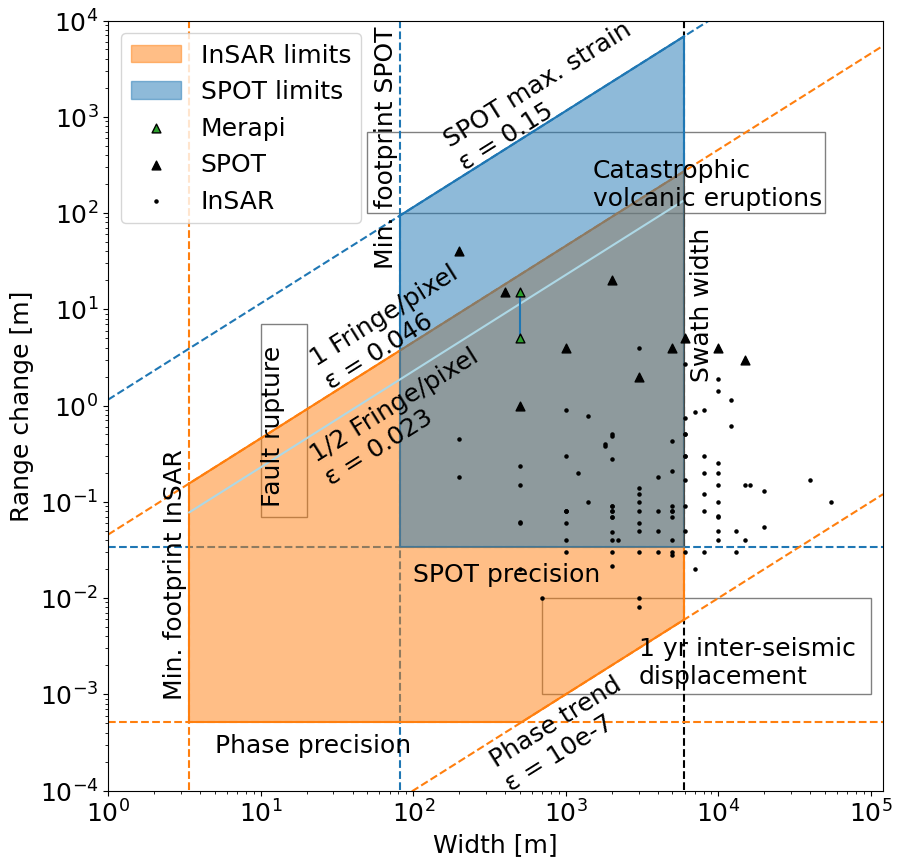

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib.patches import Polygon
import matplotlib.patches as mpatches
import pandas as pd

df = pd.read_csv('/Users/markbemelmans/Documents/PhD/lit_review/volcdef_table_v3.csv')
df_mag = df.magnitude/100
df_ax = df.major_axis*1000


# define constants
SAT_PROD = 'CSK spotlight'
WIN_SIZE = 224
RES = 0.34
N_WIN = 10
LAMBDA = 0.031
SPACING = 24
N_PIX = 10
WIDTH = 17478
WIDTH = 17500
CYCLE_SLICE = 1/30
SPOT_LIM = 1/10
SPOT_STRAIN=1.15


INSAR_color = 'tab:orange'
SPOT_color = 'tab:blue'

x_min = 1
x_max = 120_000
y_min = 0.0001
y_max = 10_000
fontsize=18
matplotlib.rcParams.update({'font.size': fontsize})

INSAR_poly = [[N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,(LAMBDA/(2*RES))*N_PIX*RES],
              [WIDTH*RES,(LAMBDA/(2*RES))*WIDTH*RES],
              [WIDTH*RES,10e-7*WIDTH*RES],
              [(CYCLE_SLICE*(LAMBDA/2))/10e-7,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)]]

SPOT_poly = [[N_PIX*SPACING*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_STRAIN*N_PIX*SPACING*RES],
              [WIDTH*RES,SPOT_STRAIN*WIDTH*RES],
              [WIDTH*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_LIM*RES]]

polygon_INSAR = Polygon(INSAR_poly, closed=True,color=INSAR_color,alpha=0.5,label=f'InSAR limits',zorder=100)
polygon_SPOT = Polygon(SPOT_poly, closed=True,color=SPOT_color,alpha=0.5,label=f'SPOT limits',zorder=100)



fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.add_patch(polygon_INSAR)
ax.add_patch(polygon_SPOT)

# plot dashed lines
ax.axvline([N_PIX*RES],ymin=y_min,ymax=y_max,c=INSAR_color,linestyle='--') # INSAR smallest displacement size
ax.axvline([N_PIX*SPACING*RES],ymin=y_min,ymax=y_max,c=SPOT_color,linestyle='--') # SPOT smallest displacement size

ax.axvline([WIDTH*RES],ymin=y_min,ymax=y_max,c='black',linestyle='--') # largest displacement size

ax.plot([x_min,x_max],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linestyle='--') # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([x_min,x_max],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linestyle='--') # SPOT smallest detectable displacement magnitude

ax.plot([x_min,x_max],[(LAMBDA/(2*RES))*x_min,(LAMBDA/(2*RES))*x_max],c=INSAR_color,linestyle='--') # INSAR max detectable lateral displacement gradient
ax.plot([x_min,x_max],[SPOT_STRAIN*x_min,SPOT_STRAIN*x_max],c=SPOT_color,linestyle='--') # SPOT max detectable lateral displacement gradient

ax.plot([x_min,x_max],[10e-7*x_min,10e-7*x_max],c=INSAR_color,linestyle='--') # INSAR min detectable lateral displacement gradient

# plot solid lines
ax.plot([N_PIX*RES,N_PIX*RES],[CYCLE_SLICE*(LAMBDA/2),(LAMBDA/(2*RES))*N_PIX*RES],c=INSAR_color) # INSAR smallest displacement size
ax.plot([N_PIX*SPACING*RES,N_PIX*SPACING*RES],[SPOT_LIM*RES,N_PIX*SPACING*RES*SPOT_STRAIN],c=SPOT_color) # SPOT smallest displacement size

ax.plot([WIDTH*RES,WIDTH*RES],[10e-7*WIDTH*RES,SPOT_LIM*RES],c=INSAR_color) # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[SPOT_LIM*RES,(LAMBDA/(2*RES))*WIDTH*RES],c='black') # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[(LAMBDA/(2*RES))*WIDTH*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color) # largest displacement size



ax.plot([N_PIX*RES,(CYCLE_SLICE*(LAMBDA/2))/10e-7],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color) # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color) # SPOT smallest detectable displacement magnitude


ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(2*RES))*N_PIX*RES,(LAMBDA/(2*RES))*WIDTH*RES],c=INSAR_color) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(4*RES))*N_PIX*RES,(LAMBDA/(4*RES))*WIDTH*RES],c='lightblue',zorder=150) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_STRAIN*N_PIX*SPACING*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color) # SPOT max detectable lateral displacement gradient

ax.plot([(CYCLE_SLICE*(LAMBDA/2))/10e-7,WIDTH*RES],[CYCLE_SLICE*(LAMBDA/2),10e-7*WIDTH*RES],c=INSAR_color) # INSAR min detectable lateral displacement gradient

## add displacement signal patches

# volc_eruptions = mpatches.Polygon([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]],facecolor=None,ec='grey')
# fault_rupture = mpatches.Polygon([[10,0.07],[10,7],[20,7],[20,0.07],[10,0.07]],facecolor=None,ec='grey')
# interseismic = mpatches.Polygon([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]],facecolor=None,ec='grey')

volc_eruptions =np.array([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]])
fault_rupture = np.array([[10,0.07],[10,7],[20,7],[20,0.07],[10,0.07]])
interseismic = np.array([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]])
ax.fill(volc_eruptions[:,0],volc_eruptions[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(fault_rupture[:,0],fault_rupture[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(interseismic[:,0],interseismic[:,1],facecolor=[0,0,0,0], ec='grey')

# ax.add_patch(volc_eruptions)
# ax.add_patch(fault_rupture)
# ax.add_patch(interseismic)
s = 40
div = 1
ax.plot([500/div,500/div],[5,15],zorder=200)
ax.scatter(500/div,5,s=s,c='tab:green',marker='^',zorder=200,ec='black',label='Merapi') # Merapi 2021
ax.scatter(500/div,15,s=s,c='tab:green',marker='^',zorder=200,ec='black') # Merapi 2021
# ax.scatter(2000/div,150,s=s,c='black',marker='^',zorder=200,ec='white') # MSH crypto dome growth
# ax.scatter(3500/div,240,s=s,c='black',marker='^',zorder=200,ec='white') # Cordon Caulle laccolith growth
# ax.scatter(2000/div,500,s=s,c='black',marker='^',zorder=200,ec='white') # Kilauea 2018 caldera floor subsidence

ax.scatter(400/div,15,s=s,c='black',marker='^',zorder=200,label='SPOT') # St. Vincent lava dome growth
ax.scatter(2000/div,20,s=s,c='black',marker='^',zorder=200) # Usu volcano crypto dome growth
ax.scatter(200/div,40,s=s,c='black',marker='^',zorder=200) # Bezymianny crater floor uplift
ax.scatter(6000/div,5,s=s,c='black',marker='^',zorder=200) # Siera Nerga co-eruptive subsidence 
ax.scatter(3000/div,2,s=s,c='black',marker='^',zorder=200) # Ambrym
ax.scatter(15000/div,3,s=s,c='black',marker='^',zorder=200) # Dabbahu dyke intrusion
ax.scatter(500/div,1,s=s,c='black',marker='^',zorder=200) # Fernandina 2005
ax.scatter(5000/div,4,s=s,c='black',marker='^',zorder=200) # Kilauea 2007
ax.scatter(1000/div,4,s=s,c='black',marker='^',zorder=200) # Pacaya 2010
ax.scatter(10000/div,4,s=s,c='black',marker='^',zorder=200) # Taal 2020

ax.scatter(df_ax,df_mag,s=20,c='black',marker='.',zorder=200,label='InSAR')
# ax.scatter(3000,0.01,s=10,c='black',marker='+') # Cerro Prieto subsidence 1 month
# ax.scatter(3000,0.3,s=10,c='black',marker='+') # Cerro Prieto subsidence 3 yr


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Width [m]',fontsize=fontsize)
ax.set_ylabel('Range change [m]',fontsize=fontsize)

ax.set_ylim([y_min,y_max])
ax.set_xlim([x_min,x_max])




## add text
# ax.text(5,0.00012,'Phase precision:\n1/60 fringe',c=INSAR_color)
# ax.text(240,0.015,'SPOT precision:\n1/10 pixel size',c=SPOT_color)
# ax.text(4500,0.1,'Swath width\n(17500 pixels)',rotation='vertical', c='black')
# ax.text(2.5,10,'Min. footprint:\n10 pixels',rotation='vertical',c=INSAR_color)
# ax.text(59,200,'Min. footprint:\n10 adj. windows',rotation='vertical',c=SPOT_color)
# ax.text(150,90,'max. strain\nɛ = 0.15',rotation=20,c=SPOT_color)
# ax.text(150,3.5,f'max. fringe rate\nɛ = {LAMBDA/(2*RES):0.2f}',rotation=20,c=INSAR_color)
# ax.text(600,0.00030,f'phase trend\nɛ = 10e-7',rotation=20,c=INSAR_color)
rot = 32
ax.text(5,0.00025,f'Phase precision',zorder=200,fontsize=fontsize)
ax.text(100,0.015,f'SPOT precision',zorder=200,fontsize=fontsize)
ax.text(6500,2,'Swath width\n',rotation='vertical',zorder=200,fontsize=fontsize)
ax.text(2.3,0.001,'Min. footprint InSAR',rotation='vertical',zorder=200,fontsize=fontsize)
ax.text(55,30,'Min. footprint SPOT',rotation='vertical',zorder=200,fontsize=fontsize)
ax.text(150,280,'SPOT max. strain\nɛ = 0.15',rotation=rot,zorder=200,fontsize=fontsize)
ax.text(20,1.5,f'1 Fringe/pixel\nɛ = {LAMBDA/(2*RES):0.3f}',rotation=rot,zorder=200,fontsize=fontsize)
ax.text(20,0.15,f'1/2 Fringe/pixel\nɛ = {LAMBDA/(4*RES):0.3f}',rotation=rot,zorder=200,fontsize=fontsize)
ax.text(300,0.0001,f'Phase trend\nɛ = 10e-7',rotation=rot,zorder=200,fontsize=fontsize)

delta = 1.15
# ax.text(500/div*delta,5,'1',zorder=200) # merapi 2021
# ax.text(2000/div*delta,150,'2',zorder=200) # MSH 1980 lave dome
# ax.text(3500/div*delta,240,'3',zorder=200) # Cordon caulle
# ax.text(2000/div*delta,500,'4',zorder=200) # Kilauea 2018

# ax.text(400/div*delta,15,'5',zorder=200) # St. Vincent 2021 lave dome
# ax.text(1500/div*delta,20,'6',zorder=200) # Usu 1990 lava dome 
# ax.text(200/div*delta,40,'7',zorder=200) # Bezimiany 2017
# ax.text(6000/div*delta,5,'8',zorder=200) # Siera negra 2005
# ax.text(3000/div*delta,2,'9',zorder=200) # Ambrym
# ax.text(15000/div*delta,3,'10',zorder=200) # Dabbahu dyke intrusion
# ax.text(500/div*delta,1,'11',zorder=200) # Fernandina 2005
# ax.text(3500/div,4,'12',zorder=200) # Kilauea 2007
# ax.text(1000/div*delta,4,'13',zorder=200) # Pacaya 2010
# ax.text(10000/div*delta,4,'14',zorder=200) # Taal 2007

# ax.text(85/div*delta,5,'Merapi 2020  Pair 1/2',zorder=200,fontsize=fontsize) # merapi 2021
# ax.text(500/div*delta,15,'Pair 3',zorder=200,fontsize=fontsize) # merapi 2021
# ax.text(450/div*delta,150,'MSH 1980',zorder=200,fontsize=fontsize) # MSH 1980 lave dome
# ax.text(250/div*delta,240,'Cordon Caulle 2011',zorder=200,fontsize=fontsize) # Cordon caulle
# ax.text(2000/div*delta,500,'Kīlauea 2018',zorder=200,fontsize=fontsize) # Kilauea 2018

# ax.text(40/div*delta,12,'St. Vincent 2021',zorder=200,fontsize=fontsize) # St. Vincent 2021 lave dome
# ax.text(1800/div*delta,20,'Usu 2000',zorder=200,fontsize=fontsize) # Usu 1990 lava dome 
# ax.text(200/div*delta,40,'Bezymiany 2016',zorder=200,fontsize=fontsize) # Bezimiany 2017
# ax.text(6000/div*delta,6,'Siera Negra 2005',zorder=200,fontsize=fontsize) # Siera negra 2005
# ax.text(3000/div*delta,1.7,'Ambrym 2015',zorder=200,fontsize=fontsize) # Ambrym
# ax.text(15000/div*delta,3,'Dabbahu 2005',zorder=200,fontsize=fontsize) # Dabbahu dyke intrusion
# ax.text(500/div*delta,1,'Fernandina 2005',zorder=200,fontsize=fontsize) # Fernandina 2005
# ax.text(1000/div,3,'Kīlauea 2007',zorder=200,fontsize=fontsize) # Kilauea 2007
# ax.text(160/div*delta,3,'Pacaya 2010',zorder=200,fontsize=fontsize) # Pacaya 2010
# ax.text(10000/div*delta,4,'Taal 2020',zorder=200,fontsize=fontsize) # Taal 2020

ax.text(3000,0.0013,'1 yr inter-seismic\ndisplacement',zorder=200,fontsize=fontsize)
ax.text(1500,120,'Catastrophic\nvolcanic eruptions',zorder=200,fontsize=fontsize)
ax.text(10,0.1,'Fault rupture',zorder=200,rotation='vertical',fontsize=fontsize)

ax.legend(loc='upper left',fontsize=fontsize)

# ax.grid(zorder=-1)

# ax.scatter(500,10,s=10,c='green',marker='+') # Merapi 2021
# ax.scatter(1000,150,s=10,c='black',marker='+') # MSH crypto dome growth
# ax.scatter(400,15,s=10,c='black',marker='+') # St. Vincent lava dome growth
# ax.scatter(1500,20,s=10,c='black',marker='+') # Usu volcano crypto dome growth
# ax.scatter(200,40,s=10,c='black',marker='+') # Bezymianny crater floor uplift
# ax.scatter(6000,5,s=10,c='black',marker='+') # Siera Nerga co-eruptive subsidence 
# ax.scatter(3000,2,s=10,c='black',marker='+') # Ambrym
# ax.scatter(15000,3,s=10,c='black',marker='+') # Dabbahu dyke intrusion
# ax.scatter(500,1,s=10,c='black',marker='+') # Fernandina 2005
# ax.scatter(5000,4,s=10,c='black',marker='+') # Kilauea 2007
# ax.scatter(1000,4,s=10,c='black',marker='+') # Pacaya 2010
# ax.scatter(10000,4,s=10,c='black',marker='+') # Taal 2020


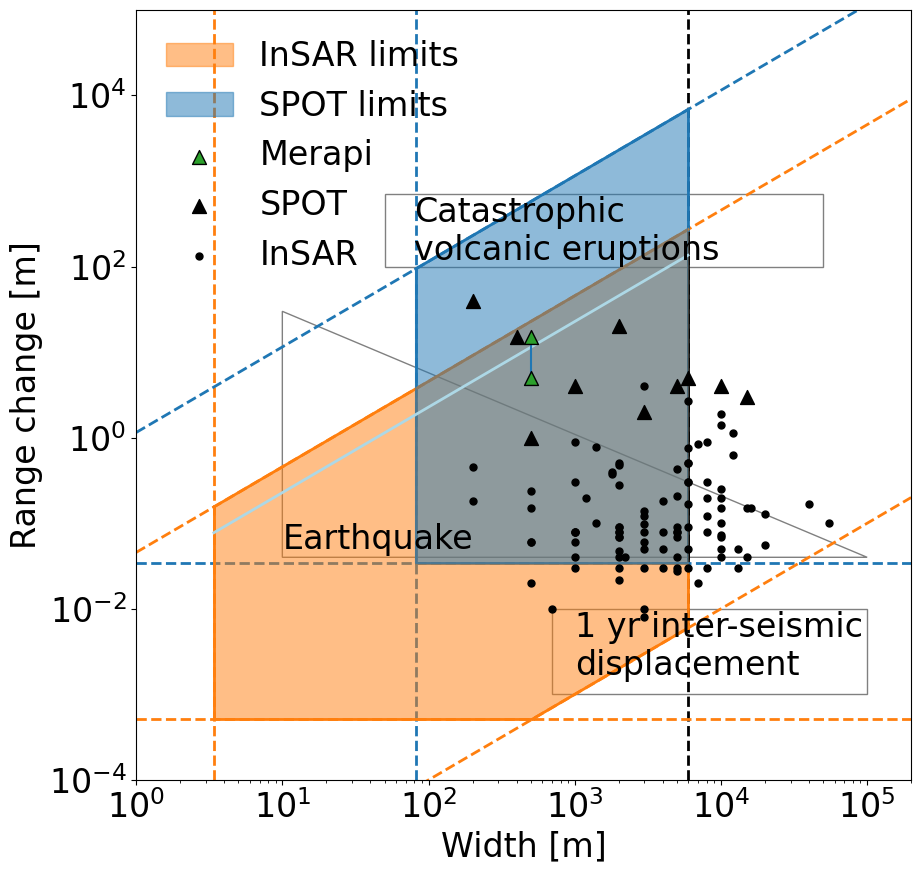

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib.patches import Polygon
import matplotlib.patches as mpatches
import pandas as pd

df = pd.read_csv('/Users/markbemelmans/Documents/PhD/lit_review/volcdef_table_v3.csv')
df_mag = df.magnitude/100
df_ax = df.major_axis*1000


# define constants
SAT_PROD = 'CSK spotlight'
WIN_SIZE = 224
RES = 0.34
N_WIN = 10
LAMBDA = 0.031
SPACING = 24
N_PIX = 10
WIDTH = 17478
WIDTH = 17500
CYCLE_SLICE = 1/30
SPOT_LIM = 1/10
SPOT_STRAIN=1.15


INSAR_color = 'tab:orange'
SPOT_color = 'tab:blue'

x_min = 1
x_max = 120_000
y_min = 0.0001
y_max = 10_000

x_min = 1
x_max = 200_000
y_min = 0.0001
y_max = 100_000

lw= 2
fontsize=24
matplotlib.rcParams.update({'font.size': fontsize})

INSAR_poly = [[N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,(LAMBDA/(2*RES))*N_PIX*RES],
              [WIDTH*RES,(LAMBDA/(2*RES))*WIDTH*RES],
              [WIDTH*RES,10e-7*WIDTH*RES],
              [(CYCLE_SLICE*(LAMBDA/2))/10e-7,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)]]

SPOT_poly = [[N_PIX*SPACING*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_STRAIN*N_PIX*SPACING*RES],
              [WIDTH*RES,SPOT_STRAIN*WIDTH*RES],
              [WIDTH*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_LIM*RES]]

polygon_INSAR = Polygon(INSAR_poly, closed=True,color=INSAR_color,alpha=0.5,label=f'InSAR limits',zorder=100)
polygon_SPOT = Polygon(SPOT_poly, closed=True,color=SPOT_color,alpha=0.5,label=f'SPOT limits',zorder=100)



fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.add_patch(polygon_INSAR)
ax.add_patch(polygon_SPOT)

# plot dashed lines
ax.axvline([N_PIX*RES],ymin=y_min,ymax=y_max,c=INSAR_color,linestyle='--',linewidth=lw) # INSAR smallest displacement size
ax.axvline([N_PIX*SPACING*RES],ymin=y_min,ymax=y_max,c=SPOT_color,linestyle='--',linewidth=lw) # SPOT smallest displacement size

ax.axvline([WIDTH*RES],ymin=y_min,ymax=y_max,c='black',linestyle='--',linewidth=lw) # largest displacement size

ax.plot([x_min,x_max],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([x_min,x_max],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linestyle='--',linewidth=lw) # SPOT smallest detectable displacement magnitude

ax.plot([x_min,x_max],[(LAMBDA/(2*RES))*x_min,(LAMBDA/(2*RES))*x_max],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR max detectable lateral displacement gradient
ax.plot([x_min,x_max],[SPOT_STRAIN*x_min,SPOT_STRAIN*x_max],c=SPOT_color,linestyle='--',linewidth=lw) # SPOT max detectable lateral displacement gradient

ax.plot([x_min,x_max],[10e-7*x_min,10e-7*x_max],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR min detectable lateral displacement gradient

# plot solid lines
ax.plot([N_PIX*RES,N_PIX*RES],[CYCLE_SLICE*(LAMBDA/2),(LAMBDA/(2*RES))*N_PIX*RES],c=INSAR_color,linewidth=lw) # INSAR smallest displacement size
ax.plot([N_PIX*SPACING*RES,N_PIX*SPACING*RES],[SPOT_LIM*RES,N_PIX*SPACING*RES*SPOT_STRAIN],c=SPOT_color,linewidth=lw) # SPOT smallest displacement size

ax.plot([WIDTH*RES,WIDTH*RES],[10e-7*WIDTH*RES,SPOT_LIM*RES],c=INSAR_color,linewidth=lw) # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[SPOT_LIM*RES,(LAMBDA/(2*RES))*WIDTH*RES],c='black',linewidth=lw) # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[(LAMBDA/(2*RES))*WIDTH*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color,linewidth=lw) # largest displacement size



ax.plot([N_PIX*RES,(CYCLE_SLICE*(LAMBDA/2))/10e-7],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linewidth=lw) # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linewidth=lw) # SPOT smallest detectable displacement magnitude


ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(2*RES))*N_PIX*RES,(LAMBDA/(2*RES))*WIDTH*RES],c=INSAR_color,linewidth=lw) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(4*RES))*N_PIX*RES,(LAMBDA/(4*RES))*WIDTH*RES],c='lightblue',zorder=150,linewidth=lw) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_STRAIN*N_PIX*SPACING*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color,linewidth=lw) # SPOT max detectable lateral displacement gradient

ax.plot([(CYCLE_SLICE*(LAMBDA/2))/10e-7,WIDTH*RES],[CYCLE_SLICE*(LAMBDA/2),10e-7*WIDTH*RES],c=INSAR_color,linewidth=lw) # INSAR min detectable lateral displacement gradient

## add displacement signal patches

# volc_eruptions = mpatches.Polygon([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]],facecolor=None,ec='grey')
# fault_rupture = mpatches.Polygon([[10,0.07],[10,7],[20,7],[20,0.07],[10,0.07]],facecolor=None,ec='grey')
# interseismic = mpatches.Polygon([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]],facecolor=None,ec='grey')

volc_eruptions =np.array([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]])
fault_rupture = np.array([[10,0.04],[10,30],[100_000,30],[100_000,0.04],[10,0.04]])
interseismic = np.array([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]])
ax.fill(volc_eruptions[:,0],volc_eruptions[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(fault_rupture[:,0],fault_rupture[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(interseismic[:,0],interseismic[:,1],facecolor=[0,0,0,0], ec='grey')

# ax.add_patch(volc_eruptions)
# ax.add_patch(fault_rupture)
# ax.add_patch(interseismic)
s = 100
div = 1
ax.plot([500/div,500/div],[5,15],zorder=200)
ax.scatter(500/div,5,s=s,c='tab:green',marker='^',zorder=200,ec='black',label='Merapi') # Merapi 2021
ax.scatter(500/div,15,s=s,c='tab:green',marker='^',zorder=200,ec='black') # Merapi 2021
# ax.scatter(2000/div,150,s=s,c='black',marker='^',zorder=200,ec='white') # MSH crypto dome growth
# ax.scatter(3500/div,240,s=s,c='black',marker='^',zorder=200,ec='white') # Cordon Caulle laccolith growth
# ax.scatter(2000/div,500,s=s,c='black',marker='^',zorder=200,ec='white') # Kilauea 2018 caldera floor subsidence

ax.scatter(400/div,15,s=s,c='black',marker='^',zorder=200,label='SPOT') # St. Vincent lava dome growth
ax.scatter(2000/div,20,s=s,c='black',marker='^',zorder=200) # Usu volcano crypto dome growth
ax.scatter(200/div,40,s=s,c='black',marker='^',zorder=200) # Bezymianny crater floor uplift
ax.scatter(6000/div,5,s=s,c='black',marker='^',zorder=200) # Siera Nerga co-eruptive subsidence 
ax.scatter(3000/div,2,s=s,c='black',marker='^',zorder=200) # Ambrym
ax.scatter(15000/div,3,s=s,c='black',marker='^',zorder=200) # Dabbahu dyke intrusion
ax.scatter(500/div,1,s=s,c='black',marker='^',zorder=200) # Fernandina 2005
ax.scatter(5000/div,4,s=s,c='black',marker='^',zorder=200) # Kilauea 2007
ax.scatter(1000/div,4,s=s,c='black',marker='^',zorder=200) # Pacaya 2010
ax.scatter(10000/div,4,s=s,c='black',marker='^',zorder=200) # Taal 2020

ax.scatter(df_ax,df_mag,s=s,c='black',marker='.',zorder=200,label='InSAR')
# ax.scatter(3000,0.01,s=10,c='black',marker='+') # Cerro Prieto subsidence 1 month
# ax.scatter(3000,0.3,s=10,c='black',marker='+') # Cerro Prieto subsidence 3 yr


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Width [m]',fontsize=fontsize)
ax.set_ylabel('Range change [m]',fontsize=fontsize)

ax.set_ylim([y_min,y_max])
ax.set_xlim([x_min,x_max])





## add text
# ax.text(5,0.00012,'Phase precision:\n1/60 fringe',c=INSAR_color)
# ax.text(240,0.015,'SPOT precision:\n1/10 pixel size',c=SPOT_color)
# ax.text(4500,0.1,'Swath width\n(17500 pixels)',rotation='vertical', c='black')
# ax.text(2.5,10,'Min. footprint:\n10 pixels',rotation='vertical',c=INSAR_color)
# ax.text(59,200,'Min. footprint:\n10 adj. windows',rotation='vertical',c=SPOT_color)
# ax.text(150,90,'max. strain\nɛ = 0.15',rotation=20,c=SPOT_color)
# ax.text(150,3.5,f'max. fringe rate\nɛ = {LAMBDA/(2*RES):0.2f}',rotation=20,c=INSAR_color)
# ax.text(600,0.00030,f'phase trend\nɛ = 10e-7',rotation=20,c=INSAR_color)
# rot = 32
# ax.text(5,0.00025,f'Phase precision',zorder=200,fontsize=fontsize)
# ax.text(100,0.015,f'SPOT precision',zorder=200,fontsize=fontsize)
# ax.text(6500,2,'Swath width\n',rotation='vertical',zorder=200,fontsize=fontsize)
# ax.text(2.3,0.001,'Min. footprint InSAR',rotation='vertical',zorder=200,fontsize=fontsize)
# ax.text(55,30,'Min. footprint SPOT',rotation='vertical',zorder=200,fontsize=fontsize)
# ax.text(150,280,'SPOT max. strain\nɛ = 0.15',rotation=rot,zorder=200,fontsize=fontsize)
# ax.text(20,1.5,f'1 Fringe/pixel\nɛ = {LAMBDA/(2*RES):0.3f}',rotation=rot,zorder=200,fontsize=fontsize)
# ax.text(20,0.15,f'1/2 Fringe/pixel\nɛ = {LAMBDA/(4*RES):0.3f}',rotation=rot,zorder=200,fontsize=fontsize)
# ax.text(300,0.0001,f'Phase trend\nɛ = 10e-7',rotation=rot,zorder=200,fontsize=fontsize)

delta = 1.15
# ax.text(500/div*delta,5,'1',zorder=200) # merapi 2021
# ax.text(2000/div*delta,150,'2',zorder=200) # MSH 1980 lave dome
# ax.text(3500/div*delta,240,'3',zorder=200) # Cordon caulle
# ax.text(2000/div*delta,500,'4',zorder=200) # Kilauea 2018

# ax.text(400/div*delta,15,'5',zorder=200) # St. Vincent 2021 lave dome
# ax.text(1500/div*delta,20,'6',zorder=200) # Usu 1990 lava dome 
# ax.text(200/div*delta,40,'7',zorder=200) # Bezimiany 2017
# ax.text(6000/div*delta,5,'8',zorder=200) # Siera negra 2005
# ax.text(3000/div*delta,2,'9',zorder=200) # Ambrym
# ax.text(15000/div*delta,3,'10',zorder=200) # Dabbahu dyke intrusion
# ax.text(500/div*delta,1,'11',zorder=200) # Fernandina 2005
# ax.text(3500/div,4,'12',zorder=200) # Kilauea 2007
# ax.text(1000/div*delta,4,'13',zorder=200) # Pacaya 2010
# ax.text(10000/div*delta,4,'14',zorder=200) # Taal 2007

# ax.text(85/div*delta,5,'Merapi 2020  Pair 1/2',zorder=200,fontsize=fontsize) # merapi 2021
# ax.text(500/div*delta,15,'Pair 3',zorder=200,fontsize=fontsize) # merapi 2021
# ax.text(450/div*delta,150,'MSH 1980',zorder=200,fontsize=fontsize) # MSH 1980 lave dome
# ax.text(250/div*delta,240,'Cordon Caulle 2011',zorder=200,fontsize=fontsize) # Cordon caulle
# ax.text(2000/div*delta,500,'Kīlauea 2018',zorder=200,fontsize=fontsize) # Kilauea 2018

# ax.text(40/div*delta,12,'St. Vincent 2021',zorder=200,fontsize=fontsize) # St. Vincent 2021 lave dome
# ax.text(1800/div*delta,20,'Usu 2000',zorder=200,fontsize=fontsize) # Usu 1990 lava dome 
# ax.text(200/div*delta,40,'Bezymiany 2016',zorder=200,fontsize=fontsize) # Bezimiany 2017
# ax.text(6000/div*delta,6,'Siera Negra 2005',zorder=200,fontsize=fontsize) # Siera negra 2005
# ax.text(3000/div*delta,1.7,'Ambrym 2015',zorder=200,fontsize=fontsize) # Ambrym
# ax.text(15000/div*delta,3,'Dabbahu 2005',zorder=200,fontsize=fontsize) # Dabbahu dyke intrusion
# ax.text(500/div*delta,1,'Fernandina 2005',zorder=200,fontsize=fontsize) # Fernandina 2005
# ax.text(1000/div,3,'Kīlauea 2007',zorder=200,fontsize=fontsize) # Kilauea 2007
# ax.text(160/div*delta,3,'Pacaya 2010',zorder=200,fontsize=fontsize) # Pacaya 2010
# ax.text(10000/div*delta,4,'Taal 2020',zorder=200,fontsize=fontsize) # Taal 2020

ax.text(1000,0.0017,'1 yr inter-seismic\ndisplacement',zorder=200,fontsize=fontsize)
ax.text(80,120,'Catastrophic\nvolcanic eruptions',zorder=200,fontsize=fontsize)
ax.text(10,0.05,'fault rupture',zorder=200,rotation='vertical',fontsize=fontsize)
ax.text(10,0.05,'fault rupture',zorder=200,rotation='vertical',fontsize=fontsize)

ax.legend(loc='upper left',fontsize=fontsize,frameon=False)

# ax.grid(zorder=-1)

# ax.scatter(500,10,s=10,c='green',marker='+') # Merapi 2021
# ax.scatter(1000,150,s=10,c='black',marker='+') # MSH crypto dome growth
# ax.scatter(400,15,s=10,c='black',marker='+') # St. Vincent lava dome growth
# ax.scatter(1500,20,s=10,c='black',marker='+') # Usu volcano crypto dome growth
# ax.scatter(200,40,s=10,c='black',marker='+') # Bezymianny crater floor uplift
# ax.scatter(6000,5,s=10,c='black',marker='+') # Siera Nerga co-eruptive subsidence 
# ax.scatter(3000,2,s=10,c='black',marker='+') # Ambrym
# ax.scatter(15000,3,s=10,c='black',marker='+') # Dabbahu dyke intrusion
# ax.scatter(500,1,s=10,c='black',marker='+') # Fernandina 2005
# ax.scatter(5000,4,s=10,c='black',marker='+') # Kilauea 2007
# ax.scatter(1000,4,s=10,c='black',marker='+') # Pacaya 2010
# ax.scatter(10000,4,s=10,c='black',marker='+') # Taal 2020
# 

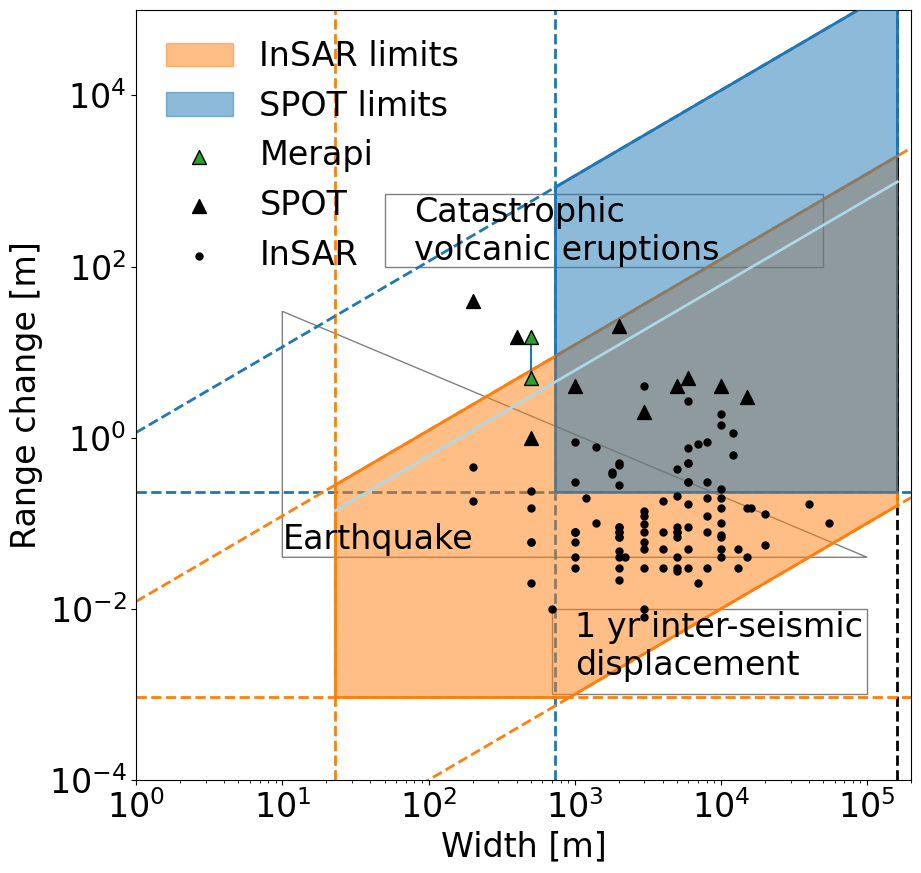

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib.patches import Polygon
import matplotlib.patches as mpatches
import pandas as pd

df = pd.read_csv('/Users/markbemelmans/Documents/PhD/lit_review/volcdef_table_v3.csv')
df_mag = df.magnitude/100
df_ax = df.major_axis*1000


# define constants
SAT_PROD = 'Sentinel 1 IW'
WIN_SIZE = 64
RES = 2.3
N_WIN = 10
LAMBDA = 0.056
SPACING = 32
N_PIX = 10
WIDTH = 17478
WIDTH = 70_000
CYCLE_SLICE = 1/30
SPOT_LIM = 1/10
SPOT_STRAIN=1.15



INSAR_color = 'tab:orange'
SPOT_color = 'tab:blue'

x_min = 1
x_max = 120_000
y_min = 0.0001
y_max = 10_000

x_min = 1
x_max = 200_000
y_min = 0.0001
y_max = 100_000

lw= 2
fontsize=24
matplotlib.rcParams.update({'font.size': fontsize})

INSAR_poly = [[N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,(LAMBDA/(2*RES))*N_PIX*RES],
              [WIDTH*RES,(LAMBDA/(2*RES))*WIDTH*RES],
              [WIDTH*RES,10e-7*WIDTH*RES],
              [(CYCLE_SLICE*(LAMBDA/2))/10e-7,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)]]

SPOT_poly = [[N_PIX*SPACING*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_STRAIN*N_PIX*SPACING*RES],
              [WIDTH*RES,SPOT_STRAIN*WIDTH*RES],
              [WIDTH*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_LIM*RES]]

polygon_INSAR = Polygon(INSAR_poly, closed=True,color=INSAR_color,alpha=0.5,label=f'InSAR limits',zorder=100)
polygon_SPOT = Polygon(SPOT_poly, closed=True,color=SPOT_color,alpha=0.5,label=f'SPOT limits',zorder=100)



fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.add_patch(polygon_INSAR)
ax.add_patch(polygon_SPOT)

# plot dashed lines
ax.axvline([N_PIX*RES],ymin=y_min,ymax=y_max,c=INSAR_color,linestyle='--',linewidth=lw) # INSAR smallest displacement size
ax.axvline([N_PIX*SPACING*RES],ymin=y_min,ymax=y_max,c=SPOT_color,linestyle='--',linewidth=lw) # SPOT smallest displacement size

ax.axvline([WIDTH*RES],ymin=y_min,ymax=y_max,c='black',linestyle='--',linewidth=lw) # largest displacement size

ax.plot([x_min,x_max],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([x_min,x_max],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linestyle='--',linewidth=lw) # SPOT smallest detectable displacement magnitude

ax.plot([x_min,x_max],[(LAMBDA/(2*RES))*x_min,(LAMBDA/(2*RES))*x_max],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR max detectable lateral displacement gradient
ax.plot([x_min,x_max],[SPOT_STRAIN*x_min,SPOT_STRAIN*x_max],c=SPOT_color,linestyle='--',linewidth=lw) # SPOT max detectable lateral displacement gradient

ax.plot([x_min,x_max],[10e-7*x_min,10e-7*x_max],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR min detectable lateral displacement gradient

# plot solid lines
ax.plot([N_PIX*RES,N_PIX*RES],[CYCLE_SLICE*(LAMBDA/2),(LAMBDA/(2*RES))*N_PIX*RES],c=INSAR_color,linewidth=lw) # INSAR smallest displacement size
ax.plot([N_PIX*SPACING*RES,N_PIX*SPACING*RES],[SPOT_LIM*RES,N_PIX*SPACING*RES*SPOT_STRAIN],c=SPOT_color,linewidth=lw) # SPOT smallest displacement size

ax.plot([WIDTH*RES,WIDTH*RES],[10e-7*WIDTH*RES,SPOT_LIM*RES],c=INSAR_color,linewidth=lw) # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[SPOT_LIM*RES,(LAMBDA/(2*RES))*WIDTH*RES],c='black',linewidth=lw) # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[(LAMBDA/(2*RES))*WIDTH*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color,linewidth=lw) # largest displacement size



ax.plot([N_PIX*RES,(CYCLE_SLICE*(LAMBDA/2))/10e-7],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linewidth=lw) # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linewidth=lw) # SPOT smallest detectable displacement magnitude


ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(2*RES))*N_PIX*RES,(LAMBDA/(2*RES))*WIDTH*RES],c=INSAR_color,linewidth=lw) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(4*RES))*N_PIX*RES,(LAMBDA/(4*RES))*WIDTH*RES],c='lightblue',zorder=150,linewidth=lw) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_STRAIN*N_PIX*SPACING*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color,linewidth=lw) # SPOT max detectable lateral displacement gradient

ax.plot([(CYCLE_SLICE*(LAMBDA/2))/10e-7,WIDTH*RES],[CYCLE_SLICE*(LAMBDA/2),10e-7*WIDTH*RES],c=INSAR_color,linewidth=lw) # INSAR min detectable lateral displacement gradient

## add displacement signal patches

# volc_eruptions = mpatches.Polygon([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]],facecolor=None,ec='grey')
# fault_rupture = mpatches.Polygon([[10,0.07],[10,7],[20,7],[20,0.07],[10,0.07]],facecolor=None,ec='grey')
# interseismic = mpatches.Polygon([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]],facecolor=None,ec='grey')

volc_eruptions =np.array([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]])
fault_rupture = np.array([[10,0.04],[10,30],[100_000,0.04],[10,0.04]])
interseismic = np.array([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]])
ax.fill(volc_eruptions[:,0],volc_eruptions[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(fault_rupture[:,0],fault_rupture[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(interseismic[:,0],interseismic[:,1],facecolor=[0,0,0,0], ec='grey')

# ax.add_patch(volc_eruptions)
# ax.add_patch(fault_rupture)
# ax.add_patch(interseismic)
s = 100
div = 1
ax.plot([500/div,500/div],[5,15],zorder=200)
ax.scatter(500/div,5,s=s,c='tab:green',marker='^',zorder=200,ec='black',label='Merapi') # Merapi 2021
ax.scatter(500/div,15,s=s,c='tab:green',marker='^',zorder=200,ec='black') # Merapi 2021
# ax.scatter(2000/div,150,s=s,c='black',marker='^',zorder=200,ec='white') # MSH crypto dome growth
# ax.scatter(3500/div,240,s=s,c='black',marker='^',zorder=200,ec='white') # Cordon Caulle laccolith growth
# ax.scatter(2000/div,500,s=s,c='black',marker='^',zorder=200,ec='white') # Kilauea 2018 caldera floor subsidence

ax.scatter(400/div,15,s=s,c='black',marker='^',zorder=200,label='SPOT') # St. Vincent lava dome growth
ax.scatter(2000/div,20,s=s,c='black',marker='^',zorder=200) # Usu volcano crypto dome growth
ax.scatter(200/div,40,s=s,c='black',marker='^',zorder=200) # Bezymianny crater floor uplift
ax.scatter(6000/div,5,s=s,c='black',marker='^',zorder=200) # Siera Nerga co-eruptive subsidence 
ax.scatter(3000/div,2,s=s,c='black',marker='^',zorder=200) # Ambrym
ax.scatter(15000/div,3,s=s,c='black',marker='^',zorder=200) # Dabbahu dyke intrusion
ax.scatter(500/div,1,s=s,c='black',marker='^',zorder=200) # Fernandina 2005
ax.scatter(5000/div,4,s=s,c='black',marker='^',zorder=200) # Kilauea 2007
ax.scatter(1000/div,4,s=s,c='black',marker='^',zorder=200) # Pacaya 2010
ax.scatter(10000/div,4,s=s,c='black',marker='^',zorder=200) # Taal 2020

ax.scatter(df_ax,df_mag,s=s,c='black',marker='.',zorder=200,label='InSAR')
# ax.scatter(3000,0.01,s=10,c='black',marker='+') # Cerro Prieto subsidence 1 month
# ax.scatter(3000,0.3,s=10,c='black',marker='+') # Cerro Prieto subsidence 3 yr


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Width [m]',fontsize=fontsize)
ax.set_ylabel('Range change [m]',fontsize=fontsize)

ax.set_ylim([y_min,y_max])
ax.set_xlim([x_min,x_max])





## add text
# ax.text(5,0.00012,'Phase precision:\n1/60 fringe',c=INSAR_color)
# ax.text(240,0.015,'SPOT precision:\n1/10 pixel size',c=SPOT_color)
# ax.text(4500,0.1,'Swath width\n(17500 pixels)',rotation='vertical', c='black')
# ax.text(2.5,10,'Min. footprint:\n10 pixels',rotation='vertical',c=INSAR_color)
# ax.text(59,200,'Min. footprint:\n10 adj. windows',rotation='vertical',c=SPOT_color)
# ax.text(150,90,'max. strain\nɛ = 0.15',rotation=20,c=SPOT_color)
# ax.text(150,3.5,f'max. fringe rate\nɛ = {LAMBDA/(2*RES):0.2f}',rotation=20,c=INSAR_color)
# ax.text(600,0.00030,f'phase trend\nɛ = 10e-7',rotation=20,c=INSAR_color)
# rot = 32
# ax.text(5,0.00025,f'Phase precision',zorder=200,fontsize=fontsize)
# ax.text(100,0.015,f'SPOT precision',zorder=200,fontsize=fontsize)
# ax.text(6500,2,'Swath width\n',rotation='vertical',zorder=200,fontsize=fontsize)
# ax.text(2.3,0.001,'Min. footprint InSAR',rotation='vertical',zorder=200,fontsize=fontsize)
# ax.text(55,30,'Min. footprint SPOT',rotation='vertical',zorder=200,fontsize=fontsize)
# ax.text(150,280,'SPOT max. strain\nɛ = 0.15',rotation=rot,zorder=200,fontsize=fontsize)
# ax.text(20,1.5,f'1 Fringe/pixel\nɛ = {LAMBDA/(2*RES):0.3f}',rotation=rot,zorder=200,fontsize=fontsize)
# ax.text(20,0.15,f'1/2 Fringe/pixel\nɛ = {LAMBDA/(4*RES):0.3f}',rotation=rot,zorder=200,fontsize=fontsize)
# ax.text(300,0.0001,f'Phase trend\nɛ = 10e-7',rotation=rot,zorder=200,fontsize=fontsize)

delta = 1.15
# ax.text(500/div*delta,5,'1',zorder=200) # merapi 2021
# ax.text(2000/div*delta,150,'2',zorder=200) # MSH 1980 lave dome
# ax.text(3500/div*delta,240,'3',zorder=200) # Cordon caulle
# ax.text(2000/div*delta,500,'4',zorder=200) # Kilauea 2018

# ax.text(400/div*delta,15,'5',zorder=200) # St. Vincent 2021 lave dome
# ax.text(1500/div*delta,20,'6',zorder=200) # Usu 1990 lava dome 
# ax.text(200/div*delta,40,'7',zorder=200) # Bezimiany 2017
# ax.text(6000/div*delta,5,'8',zorder=200) # Siera negra 2005
# ax.text(3000/div*delta,2,'9',zorder=200) # Ambrym
# ax.text(15000/div*delta,3,'10',zorder=200) # Dabbahu dyke intrusion
# ax.text(500/div*delta,1,'11',zorder=200) # Fernandina 2005
# ax.text(3500/div,4,'12',zorder=200) # Kilauea 2007
# ax.text(1000/div*delta,4,'13',zorder=200) # Pacaya 2010
# ax.text(10000/div*delta,4,'14',zorder=200) # Taal 2007

# ax.text(85/div*delta,5,'Merapi 2020  Pair 1/2',zorder=200,fontsize=fontsize) # merapi 2021
# ax.text(500/div*delta,15,'Pair 3',zorder=200,fontsize=fontsize) # merapi 2021
# ax.text(450/div*delta,150,'MSH 1980',zorder=200,fontsize=fontsize) # MSH 1980 lave dome
# ax.text(250/div*delta,240,'Cordon Caulle 2011',zorder=200,fontsize=fontsize) # Cordon caulle
# ax.text(2000/div*delta,500,'Kīlauea 2018',zorder=200,fontsize=fontsize) # Kilauea 2018

# ax.text(40/div*delta,12,'St. Vincent 2021',zorder=200,fontsize=fontsize) # St. Vincent 2021 lave dome
# ax.text(1800/div*delta,20,'Usu 2000',zorder=200,fontsize=fontsize) # Usu 1990 lava dome 
# ax.text(200/div*delta,40,'Bezymiany 2016',zorder=200,fontsize=fontsize) # Bezimiany 2017
# ax.text(6000/div*delta,6,'Siera Negra 2005',zorder=200,fontsize=fontsize) # Siera negra 2005
# ax.text(3000/div*delta,1.7,'Ambrym 2015',zorder=200,fontsize=fontsize) # Ambrym
# ax.text(15000/div*delta,3,'Dabbahu 2005',zorder=200,fontsize=fontsize) # Dabbahu dyke intrusion
# ax.text(500/div*delta,1,'Fernandina 2005',zorder=200,fontsize=fontsize) # Fernandina 2005
# ax.text(1000/div,3,'Kīlauea 2007',zorder=200,fontsize=fontsize) # Kilauea 2007
# ax.text(160/div*delta,3,'Pacaya 2010',zorder=200,fontsize=fontsize) # Pacaya 2010
# ax.text(10000/div*delta,4,'Taal 2020',zorder=200,fontsize=fontsize) # Taal 2020

ax.text(1000,0.0017,'1 yr inter-seismic\ndisplacement',zorder=200,fontsize=fontsize)
ax.text(80,120,'Catastrophic\nvolcanic eruptions',zorder=200,fontsize=fontsize)
ax.text(10,0.05,'Earthquake',zorder=200,fontsize=fontsize)

ax.legend(loc='upper left',fontsize=fontsize,frameon=False)

# ax.grid(zorder=-1)

# ax.scatter(500,10,s=10,c='green',marker='+') # Merapi 2021
# ax.scatter(1000,150,s=10,c='black',marker='+') # MSH crypto dome growth
# ax.scatter(400,15,s=10,c='black',marker='+') # St. Vincent lava dome growth
# ax.scatter(1500,20,s=10,c='black',marker='+') # Usu volcano crypto dome growth
# ax.scatter(200,40,s=10,c='black',marker='+') # Bezymianny crater floor uplift
# ax.scatter(6000,5,s=10,c='black',marker='+') # Siera Nerga co-eruptive subsidence 
# ax.scatter(3000,2,s=10,c='black',marker='+') # Ambrym
# ax.scatter(15000,3,s=10,c='black',marker='+') # Dabbahu dyke intrusion
# ax.scatter(500,1,s=10,c='black',marker='+') # Fernandina 2005
# ax.scatter(5000,4,s=10,c='black',marker='+') # Kilauea 2007
# ax.scatter(1000,4,s=10,c='black',marker='+') # Pacaya 2010
# ax.scatter(10000,4,s=10,c='black',marker='+') # Taal 2020


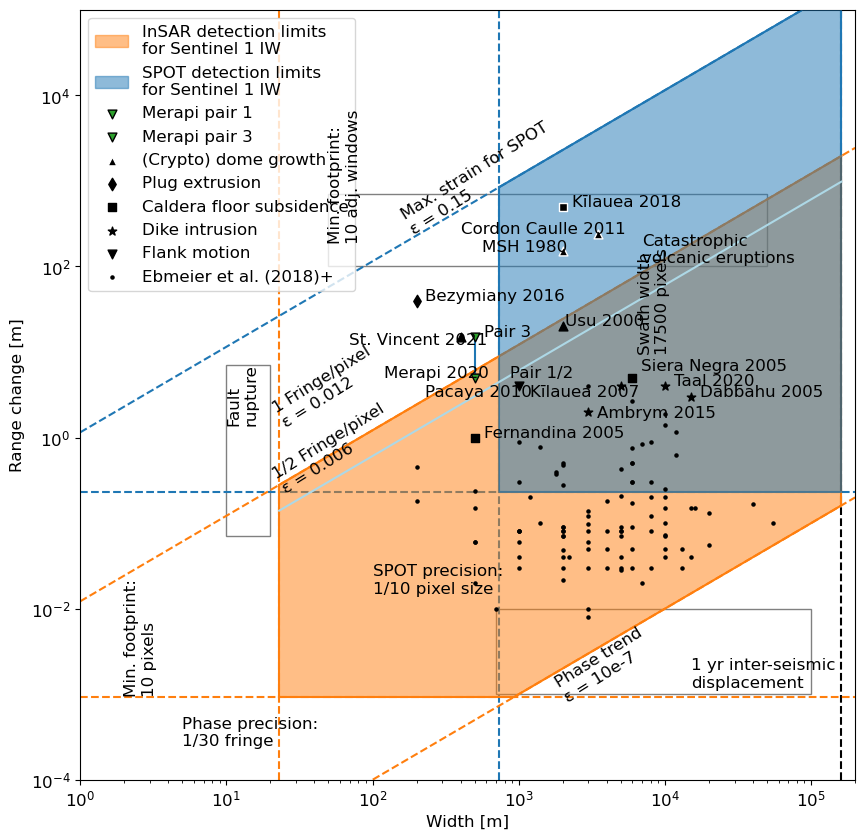

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.patches as mpatches
import pandas as pd

df = pd.read_csv('/Users/markbemelmans/Documents/PhD/lit_review/volcdef_table_v3.csv')
df_mag = df.magnitude/100
df_ax = df.major_axis*1000


# define constants
SAT_PROD = 'Sentinel 1 IW'
WIN_SIZE = 64
RES = 2.3
N_WIN = 10
LAMBDA = 0.056
SPACING = 32
N_PIX = 10
WIDTH = 17478
WIDTH = 70_000
CYCLE_SLICE = 1/30
SPOT_LIM = 1/10
SPOT_STRAIN=1.15


INSAR_color = 'tab:orange'
SPOT_color = 'tab:blue'

x_min = 1
x_max = 200_000
y_min = 0.0001
y_max = 100_000

INSAR_poly = [[N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,(LAMBDA/(2*RES))*N_PIX*RES],
              [WIDTH*RES,(LAMBDA/(2*RES))*WIDTH*RES],
              [WIDTH*RES,10e-7*WIDTH*RES],
              [(CYCLE_SLICE*(LAMBDA/2))/10e-7,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)]]

SPOT_poly = [[N_PIX*SPACING*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_STRAIN*N_PIX*SPACING*RES],
              [WIDTH*RES,SPOT_STRAIN*WIDTH*RES],
              [WIDTH*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_LIM*RES]]

polygon_INSAR = Polygon(INSAR_poly, closed=True,color=INSAR_color,alpha=0.5,label=f'InSAR detection limits\nfor {SAT_PROD}',zorder=100)
polygon_SPOT = Polygon(SPOT_poly, closed=True,color=SPOT_color,alpha=0.5,label=f'SPOT detection limits\nfor {SAT_PROD}',zorder=100)



fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.add_patch(polygon_INSAR)
ax.add_patch(polygon_SPOT)

# plot dashed lines
ax.axvline([N_PIX*RES],ymin=y_min,ymax=y_max,c=INSAR_color,linestyle='--') # INSAR smallest displacement size
ax.axvline([N_PIX*SPACING*RES],ymin=y_min,ymax=y_max,c=SPOT_color,linestyle='--') # SPOT smallest displacement size

ax.axvline([WIDTH*RES],ymin=y_min,ymax=y_max,c='black',linestyle='--') # largest displacement size

ax.plot([x_min,x_max],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linestyle='--') # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([x_min,x_max],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linestyle='--') # SPOT smallest detectable displacement magnitude

ax.plot([x_min,x_max],[(LAMBDA/(2*RES))*x_min,(LAMBDA/(2*RES))*x_max],c=INSAR_color,linestyle='--') # INSAR max detectable lateral displacement gradient
ax.plot([x_min,x_max],[SPOT_STRAIN*x_min,SPOT_STRAIN*x_max],c=SPOT_color,linestyle='--') # SPOT max detectable lateral displacement gradient

ax.plot([x_min,x_max],[10e-7*x_min,10e-7*x_max],c=INSAR_color,linestyle='--') # INSAR min detectable lateral displacement gradient

# plot solid lines
ax.plot([N_PIX*RES,N_PIX*RES],[CYCLE_SLICE*(LAMBDA/2),(LAMBDA/(2*RES))*N_PIX*RES],c=INSAR_color) # INSAR smallest displacement size
ax.plot([N_PIX*SPACING*RES,N_PIX*SPACING*RES],[SPOT_LIM*RES,N_PIX*SPACING*RES*SPOT_STRAIN],c=SPOT_color) # SPOT smallest displacement size

ax.plot([WIDTH*RES,WIDTH*RES],[10e-7*WIDTH*RES,SPOT_LIM*RES],c=INSAR_color) # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[SPOT_LIM*RES,(LAMBDA/(2*RES))*WIDTH*RES],c='black') # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[(LAMBDA/(2*RES))*WIDTH*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color) # largest displacement size



ax.plot([N_PIX*RES,(CYCLE_SLICE*(LAMBDA/2))/10e-7],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color) # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color) # SPOT smallest detectable displacement magnitude


ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(2*RES))*N_PIX*RES,(LAMBDA/(2*RES))*WIDTH*RES],c=INSAR_color) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(4*RES))*N_PIX*RES,(LAMBDA/(4*RES))*WIDTH*RES],c='lightblue',zorder=150) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_STRAIN*N_PIX*SPACING*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color) # SPOT max detectable lateral displacement gradient

ax.plot([(CYCLE_SLICE*(LAMBDA/2))/10e-7,WIDTH*RES],[CYCLE_SLICE*(LAMBDA/2),10e-7*WIDTH*RES],c=INSAR_color) # INSAR min detectable lateral displacement gradient

## add displacement signal patches

# volc_eruptions = mpatches.Polygon([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]],facecolor=None,ec='grey')
# fault_rupture = mpatches.Polygon([[10,0.07],[10,7],[20,7],[20,0.07],[10,0.07]],facecolor=None,ec='grey')
# interseismic = mpatches.Polygon([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]],facecolor=None,ec='grey')

volc_eruptions =np.array([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]])
fault_rupture = np.array([[10,0.07],[10,7],[20,7],[20,0.07],[10,0.07]])
interseismic = np.array([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]])
ax.fill(volc_eruptions[:,0],volc_eruptions[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(fault_rupture[:,0],fault_rupture[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(interseismic[:,0],interseismic[:,1],facecolor=[0,0,0,0], ec='grey')

# ax.add_patch(volc_eruptions)
# ax.add_patch(fault_rupture)
# ax.add_patch(interseismic)
s = 40
div = 1
ax.plot([500/div,500/div],[5,15],zorder=200)
ax.scatter(500/div,5,s=s,c='tab:green',marker='v',zorder=200,ec='black',label='Merapi pair 1') # Merapi 2021
ax.scatter(500/div,15,s=s,c='tab:green',marker='v',zorder=200,ec='black',label='Merapi pair 3') # Merapi 2021
ax.scatter(2000/div,150,s=s,c='black',marker='^',zorder=200,ec='white',label='(Crypto) dome growth') # MSH crypto dome growth
ax.scatter(3500/div,240,s=s,c='black',marker='^',zorder=200,ec='white') # Cordon Caulle laccolith growth
ax.scatter(2000/div,500,s=s,c='black',marker='s',zorder=200,ec='white') # Kilauea 2018 caldera floor subsidence

ax.scatter(400/div,15,s=s,c='black',marker='^',zorder=200) # St. Vincent lava dome growth
ax.scatter(2000/div,20,s=s,c='black',marker='^',zorder=200) # Usu volcano crypto dome growth
ax.scatter(200/div,40,s=s,c='black',marker='d',zorder=200,label='Plug extrusion') # Bezymianny crater floor uplift
ax.scatter(6000/div,5,s=s,c='black',marker='s',zorder=200,label='Caldera floor subsidence') # Siera Nerga co-eruptive subsidence 
ax.scatter(3000/div,2,s=s,c='black',marker='*',zorder=200,label='Dike intrusion') # Ambrym
ax.scatter(15000/div,3,s=s,c='black',marker='*',zorder=200) # Dabbahu dyke intrusion
ax.scatter(500/div,1,s=s,c='black',marker='s',zorder=200) # Fernandina 2005
ax.scatter(5000/div,4,s=s,c='black',marker='*',zorder=200) # Kilauea 2007
ax.scatter(1000/div,4,s=s,c='black',marker='v',zorder=200,label='Flank motion') # Pacaya 2010
ax.scatter(10000/div,4,s=s,c='black',marker='*',zorder=200) # Taal 2020

ax.scatter(df_ax,df_mag,s=20,c='black',marker='.',zorder=200,label='Ebmeier et al. (2018)+')
# ax.scatter(3000,0.01,s=10,c='black',marker='+') # Cerro Prieto subsidence 1 month
# ax.scatter(3000,0.3,s=10,c='black',marker='+') # Cerro Prieto subsidence 3 yr


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Width [m]')
ax.set_ylabel('Range change [m]')

ax.set_ylim([y_min,y_max])
ax.set_xlim([x_min,x_max])




## add text
# ax.text(5,0.00012,'Phase precision:\n1/60 fringe',c=INSAR_color)
# ax.text(240,0.015,'SPOT precision:\n1/10 pixel size',c=SPOT_color)
# ax.text(4500,0.1,'Swath width\n(17500 pixels)',rotation='vertical', c='black')
# ax.text(2.5,10,'Min. footprint:\n10 pixels',rotation='vertical',c=INSAR_color)
# ax.text(59,200,'Min. footprint:\n10 adj. windows',rotation='vertical',c=SPOT_color)
# ax.text(150,90,'max. strain\nɛ = 0.15',rotation=20,c=SPOT_color)
# ax.text(150,3.5,f'max. fringe rate\nɛ = {LAMBDA/(2*RES):0.2f}',rotation=20,c=INSAR_color)
# ax.text(600,0.00030,f'phase trend\nɛ = 10e-7',rotation=20,c=INSAR_color)
rot = 32
ax.text(5,0.00025,f'Phase precision:\n1/{int(1/CYCLE_SLICE)} fringe',zorder=200)
ax.text(100,0.015,f'SPOT precision:\n1/{int(1/SPOT_LIM)} pixel size',zorder=200)
ax.text(6500,10,'Swath width\n17500 pixels',rotation='vertical',zorder=200)
ax.text(2,0.001,'Min. footprint:\n10 pixels',rotation='vertical',zorder=200)
ax.text(50,200,'Min. footprint:\n10 adj. windows',rotation='vertical',zorder=200)
ax.text(150,240,'Max. strain for SPOT\nɛ = 0.15',rotation=rot,zorder=200)
ax.text(20,1.3,f'1 Fringe/pixel\nɛ = {LAMBDA/(2*RES):0.3f}',rotation=rot,zorder=200)
ax.text(20,0.22,f'1/2 Fringe/pixel\nɛ = {LAMBDA/(4*RES):0.3f}',rotation=rot,zorder=200)
ax.text(1700,0.0008,f'Phase trend\nɛ = 10e-7',rotation=rot,zorder=200)

delta = 1.15
# ax.text(500/div*delta,5,'1',zorder=200) # merapi 2021
# ax.text(2000/div*delta,150,'2',zorder=200) # MSH 1980 lave dome
# ax.text(3500/div*delta,240,'3',zorder=200) # Cordon caulle
# ax.text(2000/div*delta,500,'4',zorder=200) # Kilauea 2018

# ax.text(400/div*delta,15,'5',zorder=200) # St. Vincent 2021 lave dome
# ax.text(1500/div*delta,20,'6',zorder=200) # Usu 1990 lava dome 
# ax.text(200/div*delta,40,'7',zorder=200) # Bezimiany 2017
# ax.text(6000/div*delta,5,'8',zorder=200) # Siera negra 2005
# ax.text(3000/div*delta,2,'9',zorder=200) # Ambrym
# ax.text(15000/div*delta,3,'10',zorder=200) # Dabbahu dyke intrusion
# ax.text(500/div*delta,1,'11',zorder=200) # Fernandina 2005
# ax.text(3500/div,4,'12',zorder=200) # Kilauea 2007
# ax.text(1000/div*delta,4,'13',zorder=200) # Pacaya 2010
# ax.text(10000/div*delta,4,'14',zorder=200) # Taal 2007

ax.text(105/div*delta,5,'Merapi 2020    Pair 1/2',zorder=200) # merapi 2021
ax.text(500/div*delta,15,'Pair 3',zorder=200) # merapi 2021
ax.text(490/div*delta,150,'MSH 1980',zorder=200) # MSH 1980 lave dome
ax.text(350/div*delta,240,'Cordon Caulle 2011',zorder=200) # Cordon caulle
ax.text(2000/div*delta,500,'Kīlauea 2018',zorder=200) # Kilauea 2018

ax.text(60/div*delta,12,'St. Vincent 2021',zorder=200) # St. Vincent 2021 lave dome
ax.text(1800/div*delta,20,'Usu 2000',zorder=200) # Usu 1990 lava dome 
ax.text(200/div*delta,40,'Bezymiany 2016',zorder=200) # Bezimiany 2017
ax.text(6000/div*delta,6,'Siera Negra 2005',zorder=200) # Siera negra 2005
ax.text(3000/div*delta,1.7,'Ambrym 2015',zorder=200) # Ambrym
ax.text(15000/div*delta,3,'Dabbahu 2005',zorder=200) # Dabbahu dyke intrusion
ax.text(500/div*delta,1,'Fernandina 2005',zorder=200) # Fernandina 2005
ax.text(1200/div,3,'Kīlauea 2007',zorder=200) # Kilauea 2007
ax.text(200/div*delta,3,'Pacaya 2010',zorder=200) # Pacaya 2010
ax.text(10000/div*delta,4,'Taal 2020',zorder=200) # Taal 2020

ax.text(15000,0.0012,'1 yr inter-seismic\ndisplacement',zorder=200)
ax.text(7000,110,'Catastrophic\nvolcanic eruptions',zorder=200)
ax.text(10,1.5,'Fault\nrupture',zorder=200,rotation='vertical')

ax.legend(loc='upper left')

# ax.grid(zorder=-1)

# ax.scatter(500,10,s=10,c='green',marker='+') # Merapi 2021
# ax.scatter(1000,150,s=10,c='black',marker='+') # MSH crypto dome growth
# ax.scatter(400,15,s=10,c='black',marker='+') # St. Vincent lava dome growth
# ax.scatter(1500,20,s=10,c='black',marker='+') # Usu volcano crypto dome growth
# ax.scatter(200,40,s=10,c='black',marker='+') # Bezymianny crater floor uplift
# ax.scatter(6000,5,s=10,c='black',marker='+') # Siera Nerga co-eruptive subsidence 
# ax.scatter(3000,2,s=10,c='black',marker='+') # Ambrym
# ax.scatter(15000,3,s=10,c='black',marker='+') # Dabbahu dyke intrusion
# ax.scatter(500,1,s=10,c='black',marker='+') # Fernandina 2005
# ax.scatter(5000,4,s=10,c='black',marker='+') # Kilauea 2007
# ax.scatter(1000,4,s=10,c='black',marker='+') # Pacaya 2010
# ax.scatter(10000,4,s=10,c='black',marker='+') # Taal 2020
